# 14. Análisis de series de tiempo

El siguiente material está basado en los tutoriales de [CODEBASICS](http://codebasicshub.com/): 
* YouTube: https://www.youtube.com/playlist?list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy
* GitHub:  https://github.com/codebasics/py/tree/master/pandas

y en el manual oficial de `pandas` para la versión 0.24.1:
* http://pandas.pydata.org/pandas-docs/stable/pandas.pdf   (2977 páginas)

Primero que todo cargamos la librería:

In [1]:
import pandas as pd
print("Estamos utilizando la versión de pandas", pd.__version__)

Estamos utilizando la versión de pandas 0.23.4


A **time series** is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data. Examples of time series are heights of ocean tides, counts of sunspots, and the daily closing value of the Dow Jones Industrial Average. 

https://en.wikipedia.org/wiki/Time_series

## Parte 1: `DatetimeIndex` y `.resample()`

Primero que todo leemos las series de tiempo:

In [2]:
df = pd.read_csv("datos_ts/aapl1.csv")
df.head(2)

,Date,Open,High,Low,Close,Volume
0,7-Jul-17,142.90,144.75,142.90,144.18,19201712
1,6-Jul-17,143.02,143.50,142.41,142.73,24128782


Sin embargo, sabemos que la primera columna "Date" es el índice con el cual debemos trabajar. Aquí `parse_dates=["Date"]` nos dice que debemos transformar las cadenas de texto a fechas y `index_col="Date"` indica que ya nuestro índice serán dichas fechas:

In [3]:
df = pd.read_csv("datos_ts/aapl1.csv", parse_dates=["Date"], index_col="Date")
df.head(2)

,Open,High,Low,Close,Volume
Date,,,,,
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-06,143.02,143.50,142.41,142.73,24128782


De hecho al hacer:

In [4]:
df.index

DatetimeIndex(['2017-07-07', '2017-07-06', '2017-07-05', '2017-07-03',
               '2017-06-30', '2017-06-29', '2017-06-28', '2017-06-27',
               '2017-06-26', '2017-06-23',
               ...
               '2016-07-22', '2016-07-21', '2016-07-20', '2016-07-19',
               '2016-07-18', '2016-07-15', '2016-07-14', '2016-07-13',
               '2016-07-12', '2016-07-11'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

Observamos que las fechas son nuestro índice; también con:

In [ ]:
type(df.index)

observamos su tipo de dato.

Podemos graficar nuestra serie:

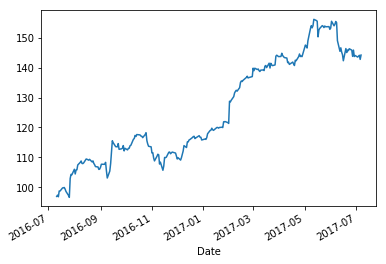

In [17]:
%matplotlib inline
#%matplotlib notebook
df['Close'].plot()

Utilizando este índice podemos obtener los datos ya sea para una fecha en específico:

In [6]:
df['2017-06-30']

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-30,144.45,144.96,143.78,144.02,23024107


Utilizando este índice podemos obtener los datos ya sea para un mes en específico:

In [7]:
df["2017-01"]

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-31,121.15,121.39,120.62,121.35,49200993
2017-01-30,120.93,121.63,120.66,121.63,30377503
2017-01-27,122.14,122.35,121.60,121.95,20562944
2017-01-26,121.67,122.44,121.60,121.94,26337576
2017-01-25,120.42,122.10,120.28,121.88,32586673
2017-01-24,119.55,120.10,119.50,119.97,23211038
2017-01-23,120.00,120.81,119.77,120.08,22050218
2017-01-20,120.45,120.45,119.73,120.00,32597892
2017-01-19,119.40,120.09,119.37,119.78,25597291


O un año en específico:

In [8]:
print(df['2017'].head(2))

              Open    High     Low   Close    Volume
Date                                                
2017-07-07  142.90  144.75  142.90  144.18  19201712
2017-07-06  143.02  143.50  142.41  142.73  24128782


E incluso sacar estadísticas de dichas fechas:

In [9]:
df['2017-01'].Close.mean()

119.57000000000001

O podemos listar los datos de un rango de fechas:

In [10]:
df['2017-01-08':'2017-01-03']

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-06,116.78,118.16,116.47,117.91,31751900
2017-01-05,115.92,116.86,115.81,116.61,22193587
2017-01-04,115.85,116.51,115.75,116.02,21118116
2017-01-03,115.80,116.33,114.76,116.15,28781865


Digamos que para el análisis de datos queremos los datos mensuales, y de dichos datos queremos las medias en el precio de cierre de la acción:

In [11]:
df['Close'].resample('M').mean()

Date
2016-07-31     99.473333
2016-08-31    107.665217
2016-09-30    110.857143
2016-10-31    115.707143
2016-11-30    110.154286
2016-12-31    114.335714
2017-01-31    119.570000
2017-02-28    133.713684
2017-03-31    140.617826
2017-04-30    142.886842
2017-05-31    152.227727
2017-06-30    147.831364
2017-07-31    143.625000
Freq: M, Name: Close, dtype: float64

Y podemos graficar dicha información:

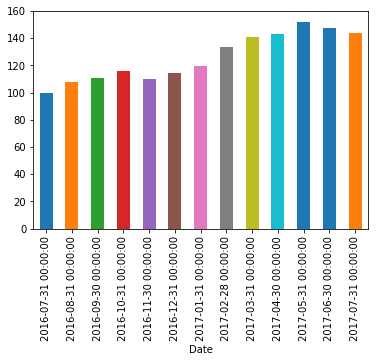

In [15]:
%matplotlib inline
df['Close'].resample('M').mean().plot(kind='bar')

## Parte 2: `date_range`

Supongamos que los datos que estamos procesando no tienen una columna con la fecha:

In [3]:
df = pd.read_csv("datos_ts/aapl_no_dates2.csv")
df.head()

,Open,High,Low,Close,Volume
0,153.17,153.33,152.22,153.18,16404088
1,153.58,155.45,152.89,155.45,27770715
2,154.34,154.45,153.46,153.93,25331662
3,153.90,155.81,153.78,154.45,26624926
4,155.02,155.98,154.48,155.37,21069647


Para crear los rangos de fecha, hacemos lo siguiente:

In [4]:
# freq='B' significa "business days", es decir, tiene en cuenta los fines de semana
# Ver: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases
rng = pd.date_range(start="6/1/2016",end="6/30/2016",freq='B')
rng

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-06',
               '2016-06-07', '2016-06-08', '2016-06-09', '2016-06-10',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-20', '2016-06-21', '2016-06-22',
               '2016-06-23', '2016-06-24', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='B')

Se debe tener en cuenta que la opción `freq='B'` no genera los festivos.

Ahora hacemos estas fechas un índice:

In [5]:
df.set_index(rng, inplace=True)
df.head()

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647


Ahora cambiemos el rango de fechas:

Aquí el `freq='D'` significa que incluiremos todos los días, incluso aquellos de los festivos:

Ver: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#timeseries-offset-aliases

In [6]:
daily_index = pd.date_range(start="6/1/2016",end="6/30/2016",freq='D')
daily_index

DatetimeIndex(['2016-06-01', '2016-06-02', '2016-06-03', '2016-06-04',
               '2016-06-05', '2016-06-06', '2016-06-07', '2016-06-08',
               '2016-06-09', '2016-06-10', '2016-06-11', '2016-06-12',
               '2016-06-13', '2016-06-14', '2016-06-15', '2016-06-16',
               '2016-06-17', '2016-06-18', '2016-06-19', '2016-06-20',
               '2016-06-21', '2016-06-22', '2016-06-23', '2016-06-24',
               '2016-06-25', '2016-06-26', '2016-06-27', '2016-06-28',
               '2016-06-29', '2016-06-30'],
              dtype='datetime64[ns]', freq='D')

Y lo verificamos contra los calculados anteriormente con `'B'`, para encontrar las fechas faltantes de el `DatetimeIndex`.

In [7]:
daily_index.difference(df.index)

DatetimeIndex(['2016-06-04', '2016-06-05', '2016-06-11', '2016-06-12',
               '2016-06-18', '2016-06-19', '2016-06-25', '2016-06-26'],
              dtype='datetime64[ns]', freq=None)

Podríamos cambiar los índices de `'B'` a `'D'` simplemente haciendo una interpolación de los datos faltantes con:

In [11]:
df.asfreq('D', method='pad')

,Open,High,Low,Close,Volume
2016-06-01,153.17,153.33,152.22,153.18,16404088
2016-06-02,153.58,155.45,152.89,155.45,27770715
2016-06-03,154.34,154.45,153.46,153.93,25331662
2016-06-04,154.34,154.45,153.46,153.93,25331662
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-06,153.90,155.81,153.78,154.45,26624926
2016-06-07,155.02,155.98,154.48,155.37,21069647
2016-06-08,155.25,155.54,154.40,154.99,21250798
2016-06-09,155.19,155.19,146.02,148.98,64882657
2016-06-10,145.74,146.09,142.51,145.42,72307330


Si se quiere mostrar semanalmente:

In [12]:
df.asfreq('W',method='pad')

,Open,High,Low,Close,Volume
2016-06-05,154.34,154.45,153.46,153.93,25331662
2016-06-12,145.74,146.09,142.51,145.42,72307330
2016-06-19,143.66,146.74,143.66,146.34,32541404
2016-06-26,147.17,148.28,145.38,145.82,25692361


Si se quiere mostrar cada hora:

In [14]:
df.asfreq('H',method='pad')

,Open,High,Low,Close,Volume
2016-06-01 00:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 01:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 02:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 03:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 04:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 05:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 06:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 07:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 08:00:00,153.17,153.33,152.22,153.18,16404088
2016-06-01 09:00:00,153.17,153.33,152.22,153.18,16404088


Supongamos que conocemos la fecha inicial pero no la final. Y supongamos que conozco la frecuencia y el número de lecturas. Con el comando siguiente podríamos generar las fechas:

In [16]:
rng = pd.date_range('1/1/2011', periods=72, freq='H')
rng

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               '2011-01-01 10:00:00', '2011-01-01 11:00:00',
               '2011-01-01 12:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 18:00:00', '2011-01-01 19:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-01 22:00:00', '2011-01-01 23:00:00',
               '2011-01-02 00:00:00', '2011-01-02 01:00:00',
               '2011-01-02 02:00:00', '2011-01-02 03:00:00',
               '2011-01-02 04:00:00', '2011-01-02 05:00:00',
               '2011-01-02 06:00:00', '2011-01-02 07:00:00',
               '2011-01-

Supongamos que quisieramos generar una serie de tiempo aleatoria. Para tal fin se importa `numpy` y generamos una secuencia de números aleatorios de la misma longitud que las fechas:

In [17]:
import numpy as np
num_aleat = np.random.randint(0,10,len(rng))
ts = pd.Series(num_aleat, index=rng)
ts.head(20)

2011-01-01 00:00:00    4
2011-01-01 01:00:00    6
2011-01-01 02:00:00    9
2011-01-01 03:00:00    8
2011-01-01 04:00:00    8
2011-01-01 05:00:00    5
2011-01-01 06:00:00    6
2011-01-01 07:00:00    9
2011-01-01 08:00:00    4
2011-01-01 09:00:00    4
2011-01-01 10:00:00    7
2011-01-01 11:00:00    3
2011-01-01 12:00:00    9
2011-01-01 13:00:00    7
2011-01-01 14:00:00    9
2011-01-01 15:00:00    9
2011-01-01 16:00:00    3
2011-01-01 17:00:00    1
2011-01-01 18:00:00    4
2011-01-01 19:00:00    1
Freq: H, dtype: int64

## Parte 3: manejando los días festivos

Supongamos que queremos leer una serie de datos, pero no tenemos las fechas:

In [31]:
df = pd.read_csv("datos_ts/aapl_no_dates3.csv")
df.head()

,Open,High,Low,Close,Volume
0,144.88,145.30,143.10,143.50,14277848
1,143.69,144.79,142.72,144.09,21569557
2,143.02,143.50,142.41,142.73,24128782
3,142.90,144.75,142.90,144.18,19201712
4,144.11,145.95,143.37,145.06,21090636


Entonces podríamos generar las fechas como:

In [33]:
rng = pd.date_range(start="7/1/2017", end="7/21/2017", freq='B')
rng

DatetimeIndex(['2017-07-03', '2017-07-04', '2017-07-05', '2017-07-06',
               '2017-07-07', '2017-07-10', '2017-07-11', '2017-07-12',
               '2017-07-13', '2017-07-14', '2017-07-17', '2017-07-18',
               '2017-07-19', '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='B')

Estando en Estados Unidos, usar `'B'` como tipo de frecuencia no genera el 4 de julio, el cual es el día de la independencia allá. El comando `'B'` solo genera los fines de semana.

Para generar el **Calendario de Estados Unidos** se hace lo siguiente:

In [34]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

us_cal = CustomBusinessDay(calendar=USFederalHolidayCalendar())

rng = pd.date_range(start="7/1/2017",end="7/23/2017", freq=us_cal)
rng

DatetimeIndex(['2017-07-03', '2017-07-05', '2017-07-06', '2017-07-07',
               '2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21'],
              dtype='datetime64[ns]', freq='C')

Ahora agregamos esas fechas a los datos leídos como:

In [35]:
df.set_index(rng,inplace=True)
df.head()

,Open,High,Low,Close,Volume
2017-07-03,144.88,145.30,143.10,143.50,14277848
2017-07-05,143.69,144.79,142.72,144.09,21569557
2017-07-06,143.02,143.50,142.41,142.73,24128782
2017-07-07,142.90,144.75,142.90,144.18,19201712
2017-07-10,144.11,145.95,143.37,145.06,21090636


Utilizaremos la clase `AbstractHolidayCalendar` para definir el calendario colombiano. `USFederalHolidayCalendar` is the only calendar available in pandas library and it serves as an example for those who want to write their own custom calendars. Here is the link for `USFederalHolidayCalendar` implementation https://github.com/pandas-dev/pandas/blob/master/pandas/tseries/holiday.py

In [124]:
from pandas.tseries.holiday import AbstractHolidayCalendar, MO, Holiday, Easter, Day
class Calendario_Colombia(AbstractHolidayCalendar):
    '''
    Días festivos de Colombia
    Ver: 
    https://es.wikipedia.org/wiki/Anexo:Días_festivos_en_Colombia
    '''
    rules = [
        # Festivos fecha fija
        Holiday('Año Nuevo',                  month=1,  day=1),
        Holiday('Día del Trabajo',            month=5,  day=1),
        Holiday('Grito de Independencia',     month=7,  day=20),
        Holiday('Batalla de Boyacá',          month=8,  day=7),
        Holiday('Inmaculada Concepción',      month=12, day=8),
        Holiday('Navidad',                    month=12, day=25),
        # Festivos respecto a La Pascua
        Holiday("Domingo de Ramos",           month=1,  day=1,  offset=[Easter(), Day(-7)]),
        Holiday("Jueves Santo",               month=1,  day=1,  offset=[Easter(), Day(-3)]),
        Holiday("Viernes Santo",              month=1,  day=1,  offset=[Easter(), Day(-2)]),
        Holiday("Domingo de Pascua",          month=1,  day=1,  offset=[Easter(), Day(0)]),
        Holiday("Ascensión de Jesús",         month=1,  day=1,  offset=[Easter(), Day(+43)]),
        Holiday("Corpus Christi",             month=1,  day=1,  offset=[Easter(), Day(+64)]),
        Holiday("Sagrado Corazón de Jesús",   month=1,  day=1,  offset=[Easter(), Day(+71)]),
        # Festivos de primer lunes
        Holiday("Epifanía (Reyes Magos)",     month=1,  day=6,  offset=pd.DateOffset(weekday=MO(1))),
        Holiday("San José",                   month=3,  day=19, offset=pd.DateOffset(weekday=MO(1))),
        Holiday("San Pedro y San Pablo",      month=6,  day=29, offset=pd.DateOffset(weekday=MO(1))),
        Holiday("Asunción de la Virgen",      month=8,  day=15, offset=pd.DateOffset(weekday=MO(1))),
        Holiday("Día de la Raza",             month=10, day=12, offset=pd.DateOffset(weekday=MO(1))),
        Holiday("Todos los Santos",           month=11, day=1,  offset=pd.DateOffset(weekday=MO(1))),
        Holiday("Independencia de Cartagena", month=11, day=11, offset=pd.DateOffset(weekday=MO(1)))    
    ]
    
colombian_calendar = CustomBusinessDay(calendar=Calendario_Colombia())
colombian_index = pd.date_range('1/1/2019','12/31/2019',freq=colombian_calendar)

Verifiquemos los días festivos Colombianos que no caen un fin de semana:

In [125]:
daily_index = pd.date_range(start='1/1/2019',end='12/31/2019',freq='B')

In [126]:
daily_index.difference(colombian_index)

DatetimeIndex(['2019-01-01', '2019-01-07', '2019-03-25', '2019-04-18',
               '2019-04-19', '2019-05-01', '2019-06-03', '2019-06-24',
               '2019-07-01', '2019-08-07', '2019-08-19', '2019-10-14',
               '2019-11-04', '2019-11-11', '2019-12-25'],
              dtype='datetime64[ns]', freq=None)

## Parte 4: to_datetime

Un problema que se tiene usualmente en las series de datos, es que estos no tienen una representación uniforme de la información. Por ejemplo, el *5 de enero de 2019* se puede escribir como:
* 2019-01-05
* Ene 5, 2019
* 01/05/2019
* 2019.01.05
* 2019/01/05
* etc.

La pregunta es como convertir dichas fechas a un solo formato.

Observe que pandas es capaz de convertir todas esas fechas a un solo formato:

In [5]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dates)

DatetimeIndex(['2017-01-05', '2017-01-05', '2017-01-05', '2017-01-05',
               '2017-01-05', '2017-01-05'],
              dtype='datetime64[ns]', freq=None)

Incluso, si contiene tiempos:

In [6]:
dt = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2016', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dt)

DatetimeIndex(['2017-01-05 14:30:00', '2017-01-05 14:30:00',
               '2016-01-05 00:00:00', '2017-01-05 00:00:00',
               '2017-01-05 00:00:00', '2017-01-05 00:00:00'],
              dtype='datetime64[ns]', freq=None)

Sin embargo, en Colombia y otros países (ver https://en.wikipedia.org/wiki/Date_format_by_country), es usual escribir la fecha como `dd/mm/aaaa`, mientras que en Estados Unidos se representa usualmente como: `mm/dd/aaaa`. En fechas como:

In [19]:
pd.to_datetime('30-12-2016')

Timestamp('2016-12-30 00:00:00')

In [20]:
pd.to_datetime('12-30-2016')

Timestamp('2016-12-30 00:00:00')

no existe confusión. Pero en fechas como Mayo 1 de 2016, si existe este problema. La confusión se resuelve con `dayfirst=True`:

In [21]:
# mayo 1 de 2016
pd.to_datetime('5-1-2016')           

Timestamp('2016-05-01 00:00:00')

In [22]:
# enero 1 de 2016
pd.to_datetime('5-1-2016', dayfirst=True)

Timestamp('2016-01-05 00:00:00')

Se podría incluso ser más específico especificando un formato:

In [23]:
pd.to_datetime('2017$01$05', format='%Y$%m$%d')

Timestamp('2017-01-05 00:00:00')

In [24]:
pd.to_datetime('2017#01#05', format='%Y#%m#%d')

Timestamp('2017-01-05 00:00:00')

Si entramos texto basura, saldrá una excepción (error):

In [29]:
# pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'])

Sin embargo, si queremos simplemente ignorar las cadenas malas, hacemos:

In [30]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='ignore')

array(['2017-01-05', 'Jan 6, 2017', 'abc'], dtype=object)

O si queremos ser más estrictos:

In [32]:
pd.to_datetime(['2017-01-05', 'Jan 6, 2017', 'abc'], errors='coerce')

DatetimeIndex(['2017-01-05', '2017-01-06', 'NaT'], dtype='datetime64[ns]', freq=None)

donde `NaT` signifnica Not a Timestamp.

Si el tiempo me lo dan en epochs (tiempo desde Enero 1, de 1970 a las 00:00:00 UTC) lo podemos convertir al tiempo, especificando las unidades:

In [34]:
current_epoch = 1501324478
pd.to_datetime(current_epoch, unit='s')

Timestamp('2017-07-29 10:34:38')

In [35]:
pd.to_datetime(current_epoch*1000, unit='ms')

Timestamp('2017-07-29 10:34:38')

O incluso pasando un array:

In [37]:
t = pd.to_datetime([current_epoch], unit='s')
t

DatetimeIndex(['2017-07-29 10:34:38'], dtype='datetime64[ns]', freq=None)

Y lo volvemos de nuevo epochs:

In [39]:
t.view('int64')

array([1501324478000000000])

## Parte 5: `TimeSpan`, `Period` y `PeriodIndex`

## Periodos

Creemos el **periodo anual** de 2016:

In [65]:
y = pd.Period('2016')
y

Period('2016', 'A-DEC')

Para listar las propiedades de este periodo, hacemos lo siguiente:

In [66]:
dir(y)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rsub__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_add_delta',
 '_from_ordinal',
 '_maybe_convert_freq',
 '_typ',
 'asfreq',
 'day',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'end_time',
 'freq',
 'freqstr',
 'hour',
 'is_leap_year',
 'minute',
 'month',
 'now',
 'ordinal',
 'quarter',
 'qyear',
 'second',
 'start_time',
 'strftime',
 'to_timestamp',
 'week',
 'weekday',
 'weekofyear',
 'year']

Por ejemplo: 

In [67]:
y.start_time   # Tiempo inicial

Timestamp('2016-01-01 00:00:00')

In [68]:
y.end_time     # Tiempo final

Timestamp('2016-12-31 23:59:59.999999999')

In [69]:
y.is_leap_year # ¿es un año bisiesto?

True

Creemos el **periodo mensual** de Diciembre de 2017:

In [70]:
m = pd.Period('2017-12', freq='M')
m

Period('2017-12', 'M')

In [71]:
m.start_time

Timestamp('2017-12-01 00:00:00')

In [72]:
m.end_time

Timestamp('2017-12-31 23:59:59.999999999')

Observe que podemos realizar con los periodos sumas y restas:

In [73]:
m+1

Period('2018-01', 'M')

Creemos el **periodo diario** de Febrero 28 de 2016:

In [74]:
d = pd.Period('2016-02-28', freq='D')
d

Period('2016-02-28', 'D')

In [75]:
d.start_time

Timestamp('2016-02-28 00:00:00')

In [76]:
d.end_time

Timestamp('2016-02-28 23:59:59.999999999')

Observe que estamos teniendo en cuenta que el año fue bisiesto:

In [22]:
d+1

Period('2016-02-29', 'D')

Creemos el **periodo horario** de Agosto 15 de 2017 a las 23:00 horas:

In [29]:
h = pd.Period('2017-08-15 23:00:00',freq='H')
h

Period('2017-08-15 23:00', 'H')

In [30]:
h+1

Period('2017-08-16 00:00', 'H')

El mismo resultado anterior se pudo obtener con el comando:

In [31]:
h+pd.offsets.Hour(1)

Period('2017-08-16 00:00', 'H')

Creemos el **periodo trimestral** del primer trimestre de 2017:

In [48]:
q1= pd.Period('2017Q1', freq='Q-DEC') 
q1

Period('2017Q1', 'Q-DEC')

Aquí `Q-DEC` especifica cuando termina el año fiscal. En este caso, en Diciembre.

In [49]:
q1.start_time

Timestamp('2017-01-01 00:00:00')

In [50]:
q1.end_time

Timestamp('2017-03-31 23:59:59.999999999')

Tenga en cuenta que algunas empresas tienen años fiscales que empiezan por ejemplo en Febrero y terminan en Enero del siguiente año. Dichos trimestres se definen como:

In [61]:
q1= pd.Period('2017Q2', freq='Q-JAN') # especifico segundo trimestre

Aquí `Q-JAN` especifica cuando termina el año fiscal. En este caso, en Enero.

In [62]:
q1.start_time

Timestamp('2016-05-01 00:00:00')

In [63]:
q1.end_time

Timestamp('2016-07-31 23:59:59.999999999')

<h4>Use asfreq to convert period to a different frequency</h4>

In [55]:
q1.asfreq('M',how='start')

Period('2016-02', 'M')

In [39]:
q1.asfreq('M',how='end')

Period('2016-04', 'M')

Creemos un **periodo semanal**:

In [41]:
w = pd.Period('2017-07-05',freq='W')
w

Period('2017-07-03/2017-07-09', 'W-SUN')

In [42]:
w-1

Period('2017-06-26/2017-07-02', 'W-SUN')

In [43]:
w2 = pd.Period('2017-08-15',freq='W')
w2

Period('2017-08-14/2017-08-20', 'W-SUN')

Podemos contar las semanas que existen entre dichos periodos:

In [64]:
w2-w

6

En términos generales todos los periodos se pueden especificar de acuerdo con https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

## Rango de periodos

Creemos todos los trimestres entre el 2011 y el 2017:

In [95]:
r = pd.period_range('2011', '2017', freq='Q')
r

PeriodIndex(['2011Q1', '2011Q2', '2011Q3', '2011Q4', '2012Q1', '2012Q2',
             '2012Q3', '2012Q4', '2013Q1', '2013Q2', '2013Q3', '2013Q4',
             '2014Q1', '2014Q2', '2014Q3', '2014Q4', '2015Q1', '2015Q2',
             '2015Q3', '2015Q4', '2016Q1', '2016Q2', '2016Q3', '2016Q4',
             '2017Q1'],
            dtype='period[Q-DEC]', freq='Q-DEC')

In [96]:
r[0].start_time

Timestamp('2011-01-01 00:00:00')

In [97]:
r[0].end_time

Timestamp('2011-03-31 23:59:59.999999999')

Pero si el año fiscal empieza en febrero y termina en enero, debo hacer:

In [98]:
r = pd.period_range('2011', '2017', freq='q-jan')
r

PeriodIndex(['2011Q4', '2012Q1', '2012Q2', '2012Q3', '2012Q4', '2013Q1',
             '2013Q2', '2013Q3', '2013Q4', '2014Q1', '2014Q2', '2014Q3',
             '2014Q4', '2015Q1', '2015Q2', '2015Q3', '2015Q4', '2016Q1',
             '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2', '2017Q3',
             '2017Q4'],
            dtype='period[Q-JAN]', freq='Q-JAN')

In [86]:
r[0].start_time

Timestamp('2010-11-01 00:00:00')

In [87]:
r[0].end_time

Timestamp('2011-01-31 23:59:59.999999999')

Quiero generar 30 periodos que trimestrales que empiecen en Enero de 2016:

In [105]:
idx = pd.PeriodIndex(start='2016-01', freq='3M', periods=30)
idx

PeriodIndex(['2016-01', '2016-04', '2016-07', '2016-10', '2017-01', '2017-04',
             '2017-07', '2017-10', '2018-01', '2018-04', '2018-07', '2018-10',
             '2019-01', '2019-04', '2019-07', '2019-10', '2020-01', '2020-04',
             '2020-07', '2020-10', '2021-01', '2021-04', '2021-07', '2021-10',
             '2022-01', '2022-04', '2022-07', '2022-10', '2023-01', '2023-04'],
            dtype='period[3M]', freq='3M')

In [106]:
import numpy as np
ps = pd.Series(np.random.randn(len(idx)), idx)
ps

2016-01   -1.064625
2016-04    0.337435
2016-07    0.552362
2016-10   -1.539891
2017-01   -0.269032
2017-04    1.258054
2017-07   -0.538448
2017-10    0.614598
2018-01   -0.339695
2018-04   -0.863146
2018-07   -0.391614
2018-10   -0.415978
2019-01    0.204713
2019-04   -0.905059
2019-07   -1.167770
2019-10    0.852738
2020-01    0.082816
2020-04   -0.401479
2020-07    0.552972
2020-10    1.056212
2021-01   -0.745721
2021-04    0.243139
2021-07    1.292266
2021-10    0.761557
2022-01    0.541158
2022-04   -2.900860
2022-07   -0.621390
2022-10    0.499091
2023-01   -0.420418
2023-04    0.539512
Freq: 3M, dtype: float64

Si quiero referirme únicamente a los periodos del 2016 hago:

In [107]:
ps['2016']

2016-01   -1.064625
2016-04    0.337435
2016-07    0.552362
2016-10   -1.539891
2017-01   -0.269032
Freq: 3M, dtype: float64

O a los periodos del 2017 y del 2017:

In [110]:
ps['2016':'2017']

2016-01   -1.064625
2016-04    0.337435
2016-07    0.552362
2016-10   -1.539891
2017-01   -0.269032
2017-04    1.258054
2017-07   -0.538448
2017-10    0.614598
Freq: 3M, dtype: float64

<h4>Converting between representations</h4>

Voy en minuto 15:

In [113]:
pst = ps.to_timestamp()
pst

2016-01-01   -1.064625
2016-04-01    0.337435
2016-07-01    0.552362
2016-10-01   -1.539891
2017-01-01   -0.269032
2017-04-01    1.258054
2017-07-01   -0.538448
2017-10-01    0.614598
2018-01-01   -0.339695
2018-04-01   -0.863146
2018-07-01   -0.391614
2018-10-01   -0.415978
2019-01-01    0.204713
2019-04-01   -0.905059
2019-07-01   -1.167770
2019-10-01    0.852738
2020-01-01    0.082816
2020-04-01   -0.401479
2020-07-01    0.552972
2020-10-01    1.056212
2021-01-01   -0.745721
2021-04-01    0.243139
2021-07-01    1.292266
2021-10-01    0.761557
2022-01-01    0.541158
2022-04-01   -2.900860
2022-07-01   -0.621390
2022-10-01    0.499091
2023-01-01   -0.420418
2023-04-01    0.539512
Freq: QS-OCT, dtype: float64

In [51]:
pst.index

DatetimeIndex(['2016-01-01', '2016-04-01', '2016-07-01', '2016-10-01',
               '2017-01-01', '2017-04-01', '2017-07-01', '2017-10-01',
               '2018-01-01', '2018-04-01'],
              dtype='datetime64[ns]', freq='QS-OCT')

In [54]:
ps = pst.to_period()
ps

2016Q1   -0.895267
2016Q2    1.343498
2016Q3   -0.979625
2016Q4   -0.292720
2017Q1    0.275139
2017Q2    1.200450
2017Q3    1.890607
2017Q4    0.259646
2018Q1   -1.113016
2018Q2    1.669858
Freq: Q-DEC, dtype: float64

In [55]:
ps.index

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4', '2018Q1', '2018Q2'],
            dtype='period[Q-DEC]', freq='Q-DEC')

<h3 style="color:purple">Processing Wal Mart's Financials</h3>

In [74]:
import pandas as pd
df = pd.read_csv("wmt.csv")
df

,Line Item,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1
0,Revenue,115904,120854,118179,130936,117542
1,Expenses,86544,89485,87484,97743,87688
2,Profit,29360,31369,30695,33193,29854


In [25]:
df.set_index("Line Item",inplace=True)
df = df.T
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [26]:
df.index = pd.PeriodIndex(df.index, freq="Q-JAN")
df

Line Item,Revenue,Expenses,Profit
2017Q1,115904,86544,29360
2017Q2,120854,89485,31369
2017Q3,118179,87484,30695
2017Q4,130936,97743,33193
2018Q1,117542,87688,29854


In [27]:
df.index

PeriodIndex(['2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1'], dtype='period[Q-JAN]', freq='Q-JAN')

In [28]:
df.index[0].start_time

Timestamp('2016-02-01 00:00:00')

<h4 style="color:green">Add start date end date columns to dataframe</h4>

In [29]:
df["Start Date"]=df.index.map(lambda x: x.start_time)
df

Line Item,Revenue,Expenses,Profit,Start Date
2017Q1,115904,86544,29360,2016-02-01
2017Q2,120854,89485,31369,2016-05-01
2017Q3,118179,87484,30695,2016-08-01
2017Q4,130936,97743,33193,2016-11-01
2018Q1,117542,87688,29854,2017-02-01


In [30]:
df["End Date"]=df.index.map(lambda x: x.end_time)
df

Line Item,Revenue,Expenses,Profit,Start Date,End Date
2017Q1,115904,86544,29360,2016-02-01,2016-04-30
2017Q2,120854,89485,31369,2016-05-01,2016-07-31
2017Q3,118179,87484,30695,2016-08-01,2016-10-31
2017Q4,130936,97743,33193,2016-11-01,2017-01-31
2018Q1,117542,87688,29854,2017-02-01,2017-04-30
